In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [9]:
data = pd.read_csv("Billionaires Statistics Dataset.csv")
data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [3]:
result = adfuller(data['finalWorth'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -16.008568748011797
p-value: 6.393407645585258e-29


In [4]:

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [5]:

model = AutoReg(train['finalWorth'], lags=13)
model_fit = model.fit()

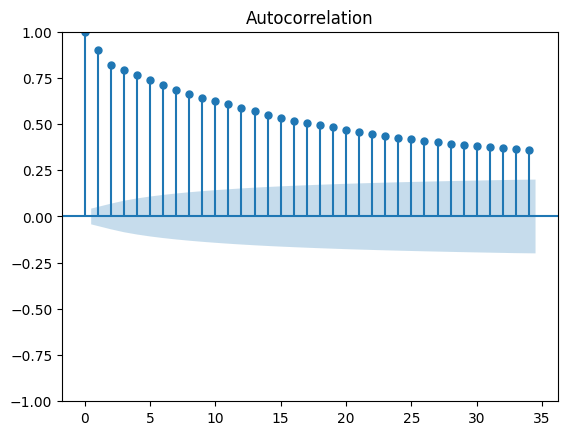

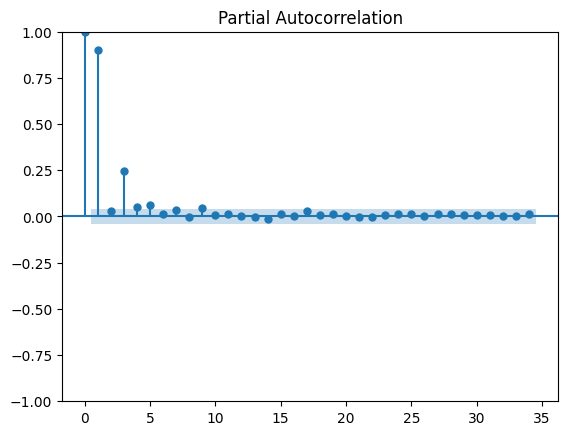

In [6]:

plot_acf(train['finalWorth'])
plt.show()
plot_pacf(train['finalWorth'])
plt.show()

In [7]:

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

mse = ((predictions - test['finalWorth']) ** 2).mean()
print('Mean Squared Error:', mse)


Mean Squared Error: 2817086.1160606015


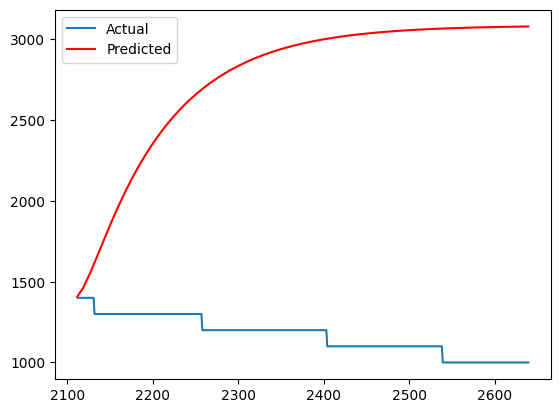

In [8]:

plt.plot(test.index, test['finalWorth'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.legend()
plt.show()